I. Experimental preparation

# This data comes from kaggle, contains 14 dimensions, 303 samples, the specific variables are described in the following table
|variable|description|value area|
|-|-|-|
|output|Presence of heart disease (categorical variable)|target : 0= less chance of heart attack 1= more chance of heart attack|
|age|age (continuous variable)|[29, 77]|
|sex|sex (continuous variable)|0=female, 1=male|
|cp|Experience of chest pain (categorical variable)|0=typical angina, 1=atypical angina, 2=non-angina, 3=asymptomatic|
|trtbps|Resting blood pressure (continuous variable Hg)|[94， 200]|
|chol|Human cholesterol (continuous variable mg/dl)|[126, 564]|
|fbs|Fasting blood glucose (categorical variable >120 mg/dl)|0=false, 1=true|
|restecg|Resting ECG measurements (categorical variables)|0=normal, 1=with ST-T wave abnormalities, 2=probable or definite left ventricular hypertrophy by Estes criteria|
|thalachh|Maximum heart rate (continuous variable)|[71, 202]|
|exng|Exercise-induced angina (categorical variable)|0=no, 1=yes|
|oldpeak|ST-segment depression induced by exercise relative to rest (continuous variable)|[0, 6.2]|
|slp|Slope of peak motion ST segment (categorical variable)|0=rising, 1=flat, 2=falling|
|caa|Number of major vessels (continuous variable)|[0, 3]|
|thall|Blood disorders of thalassemia (categorical variable)|0=null,1=normal, 2=fixed defects, 3=reversible defects|

Importing related libraries

In [897]:
# Data set characterization related libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data set preprocessing related libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Random Forest Related Libraries
from sklearn.ensemble import RandomForestClassifier
# Logistic regression related libraries
from sklearn.linear_model import LogisticRegression
# SGD Classification Related Libraries
from sklearn.linear_model import SGDClassifier
# K Nearest Neighbor Algorithm Related Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve,average_precision_score,auc
# Decision Tree Related Libraries
from sklearn.tree import DecisionTreeClassifier
# Associate Rule Mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


II. Data presentation

In [898]:
# fix random seed
random_seed=3407
random.seed(random_seed)
np.random.seed(random_seed)

# Setting the display style of the chart
plt.rcParams['font.sans-serif'] = ['SimHei']    

In [899]:
heart_df = pd.read_csv("./dataSet/heart.csv")

# copy original data for Association Rule Mining
heart_df4arm=heart_df.copy()

print(heart_df.shape)   # View the dimensions of the data
print(heart_df.head())  # View the first 5 rows of the data
print(heart_df.info())  # Show detailed information about the data
print(heart_df.describe())      # Describe statistically relevant information
print(heart_df.isnull().sum())  # Missing value check


(303, 14)
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   

In [900]:
summary = heart_df.describe()
print(summary)

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [901]:
unique_values = heart_df.nunique()
print(unique_values)
for column in ['sex','cp','fbs','restecg','exng','slp','caa','thall','output']:
    unique_values = heart_df[column].unique()
    print(f"Unique values in {column}: {unique_values}")



age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64
Unique values in sex: [1 0]
Unique values in cp: [3 2 1 0]
Unique values in fbs: [1 0]
Unique values in restecg: [0 1 2]
Unique values in exng: [0 1]
Unique values in slp: [0 2 1]
Unique values in caa: [0 2 1 3 4]
Unique values in thall: [1 2 3 0]
Unique values in output: [1 0]


A unified look at the distribution of all features

C:\Users\86153\AppData\Local\Temp\ipykernel_9508\2698907585.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df.iloc[:,x],kde=True)
C:\Users\86153\AppData\Local\Temp\ipykernel_9508\2698907585.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_df.iloc[:,x],kde=True)
C:\Users\86153

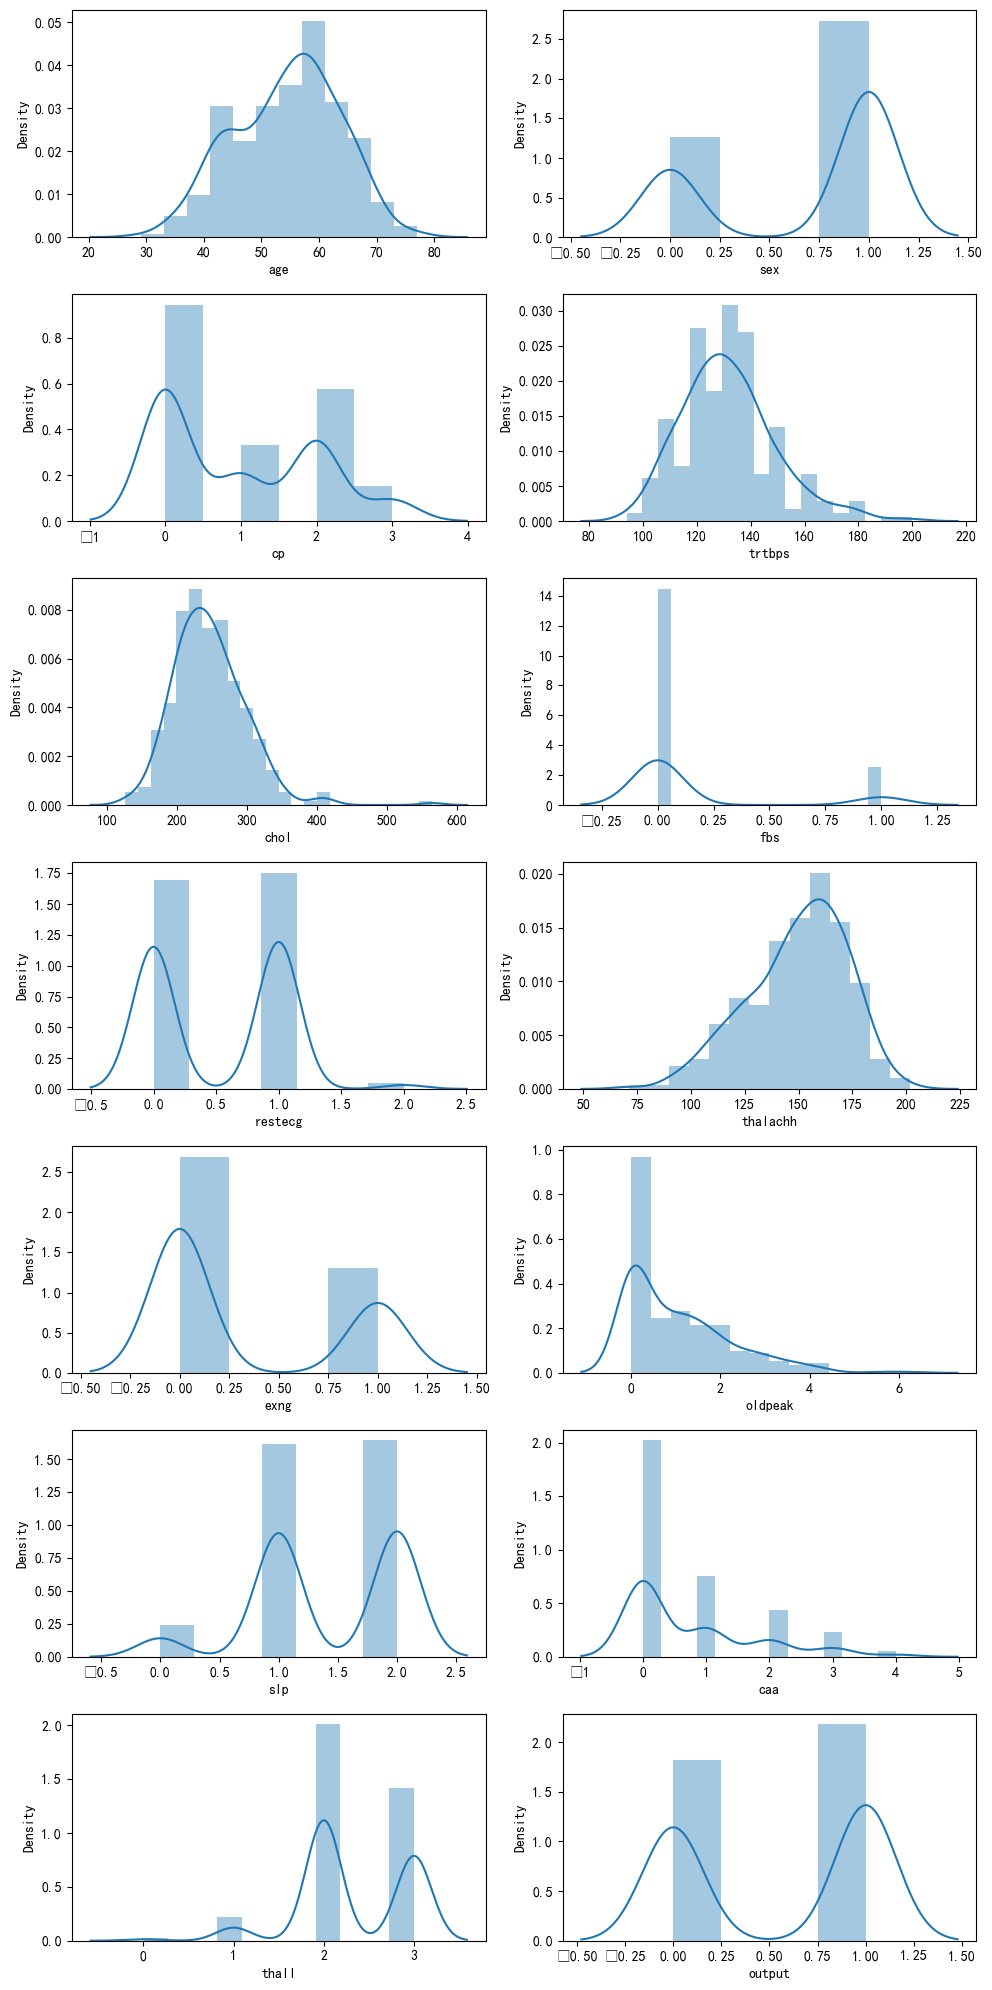

In [902]:
fig,axes = plt.subplots(7,2,figsize=(10,20))
for x in range(0,14):
    plt.subplot(7,2,x+1)
    sns.distplot(heart_df.iloc[:,x],kde=True)
plt.tight_layout()
plt.show()

observing the relationship between the output and every variable

d:\Users\86153\anaconda3\envs\joyrl\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
d:\Users\86153\anaconda3\envs\joyrl\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
d:\Users\86153\anaconda3\envs\joyrl\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


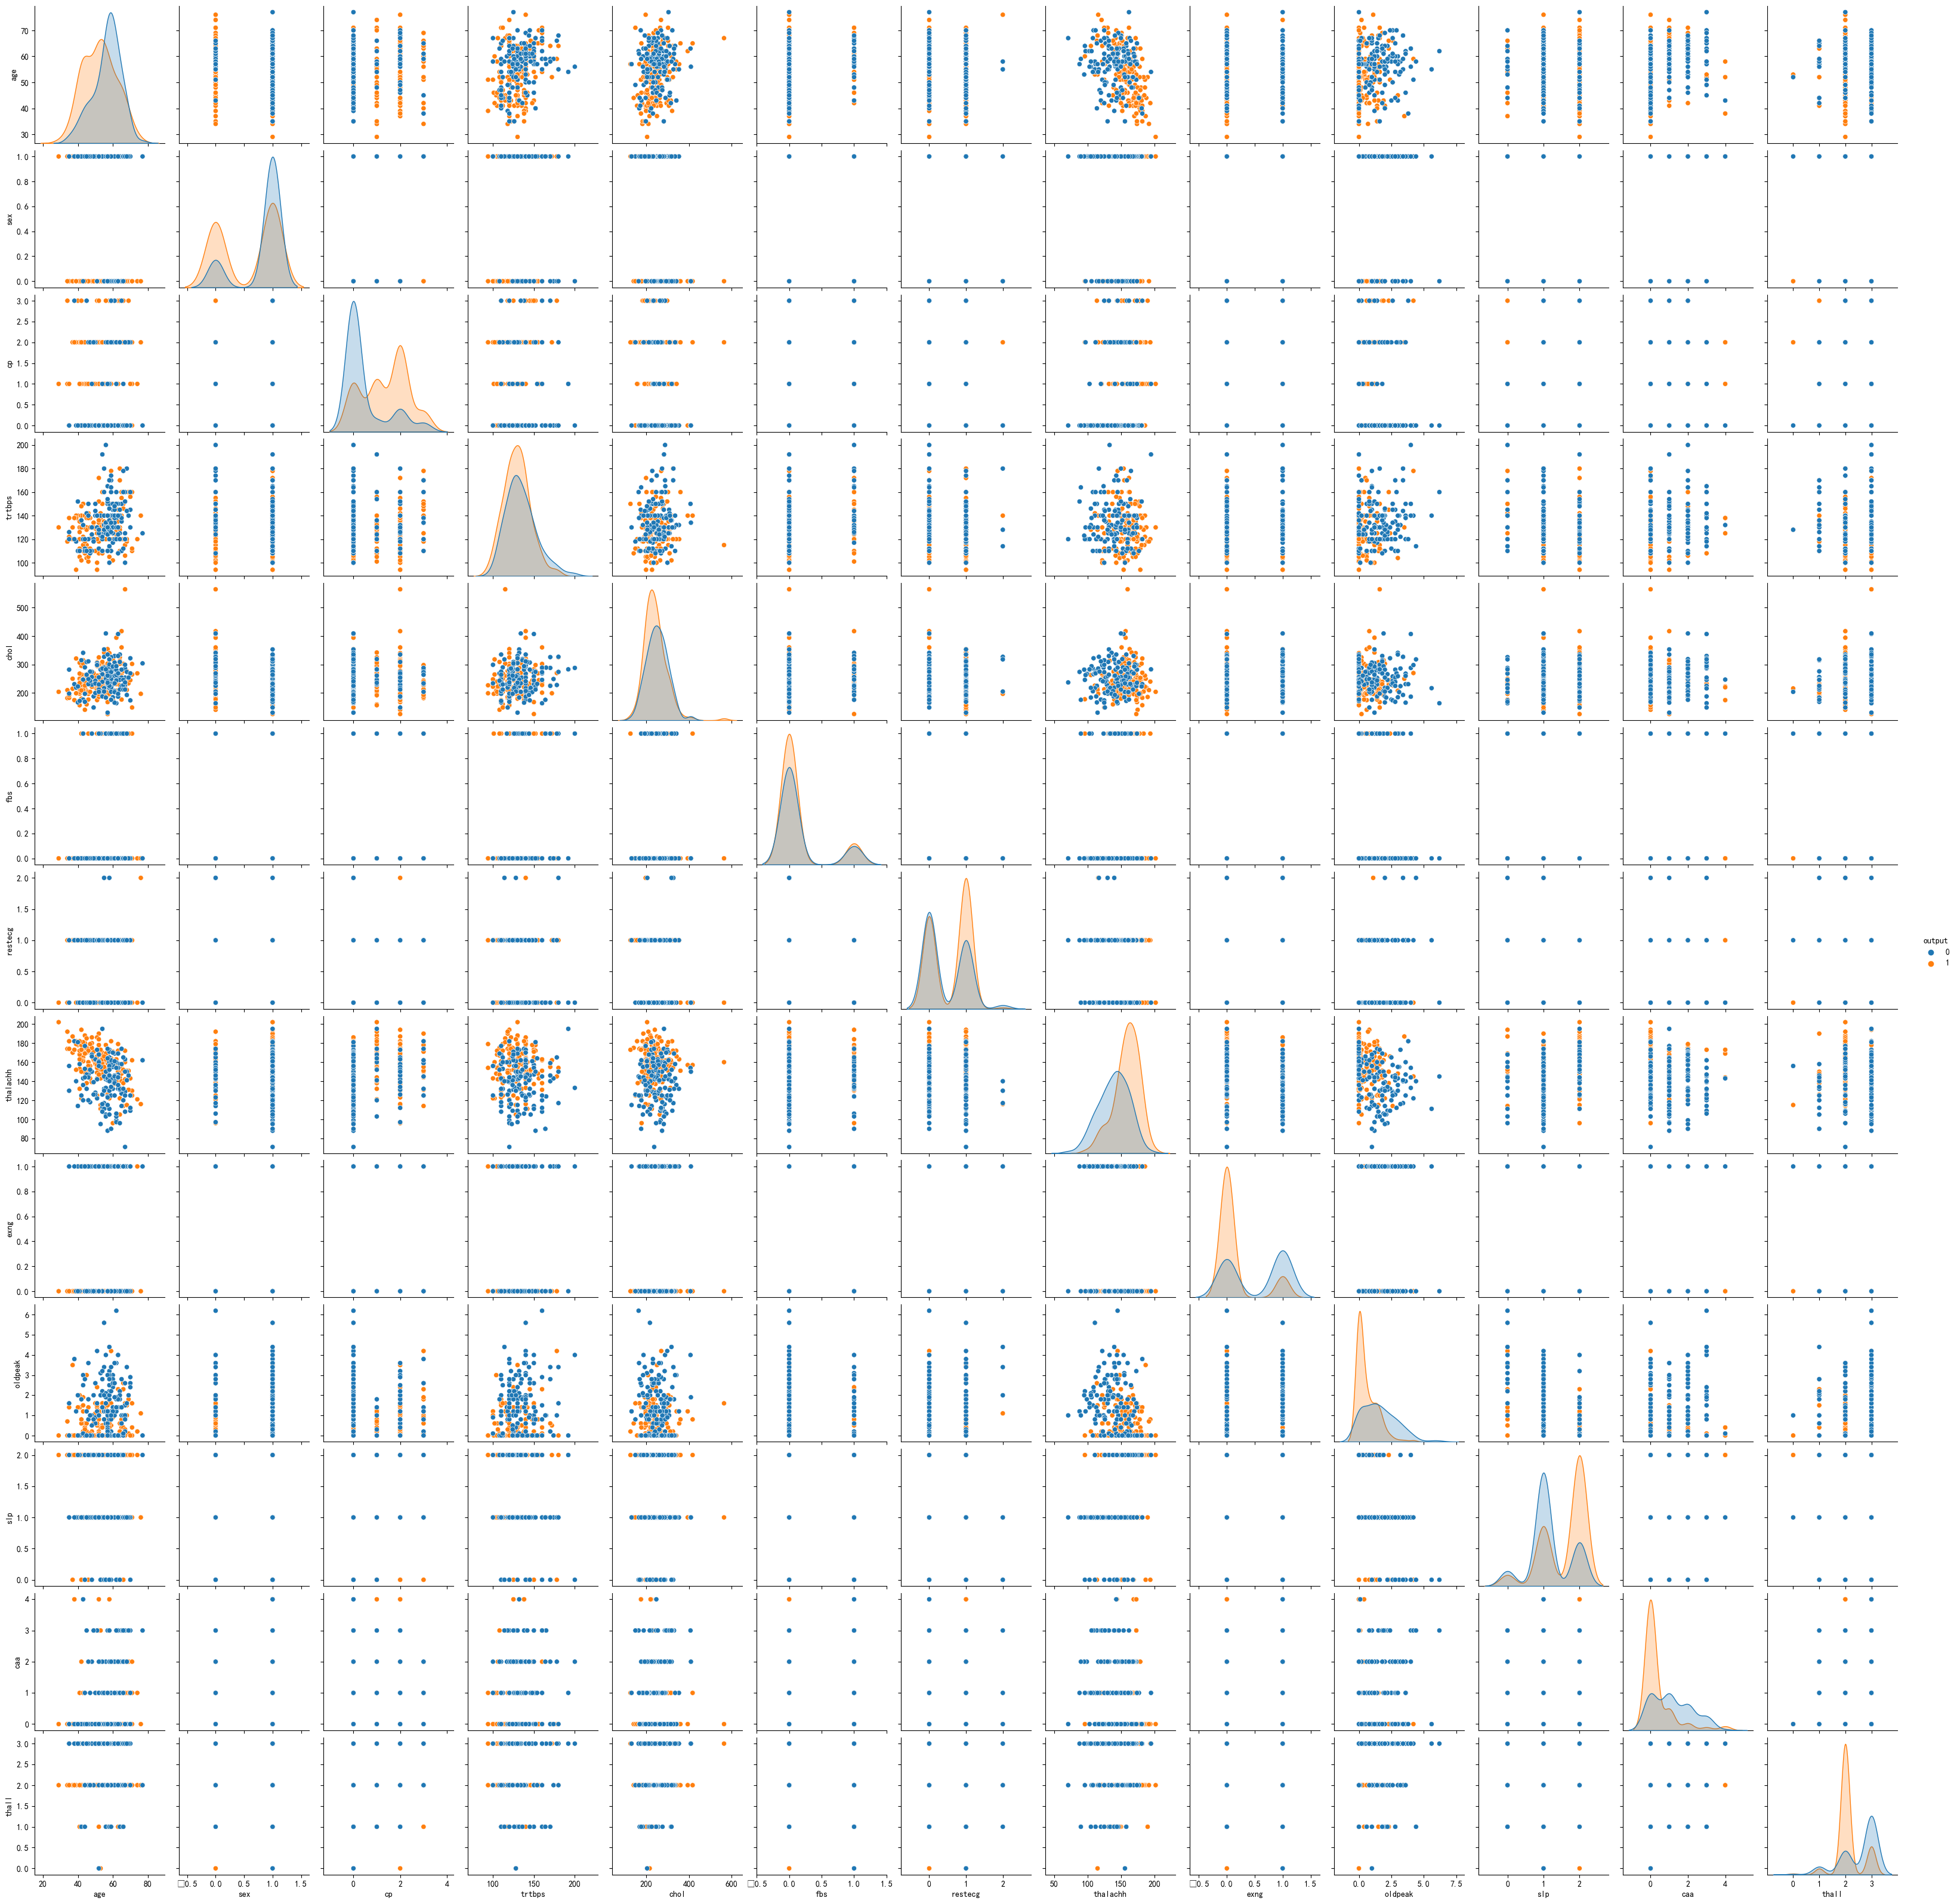

In [903]:
sns.pairplot(heart_df,hue='output')
plt.show()

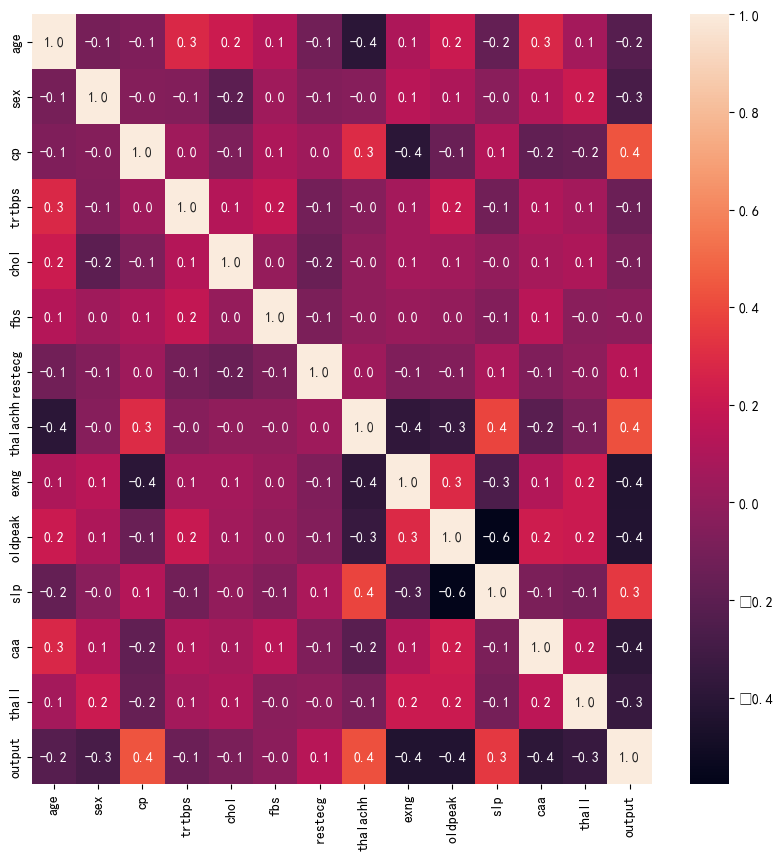

In [904]:
# Plotting the correlation coefficients of the variables
plt.figure(figsize=(10,10))
sns.heatmap(heart_df.corr(),annot=True,fmt='.1f')
plt.show()


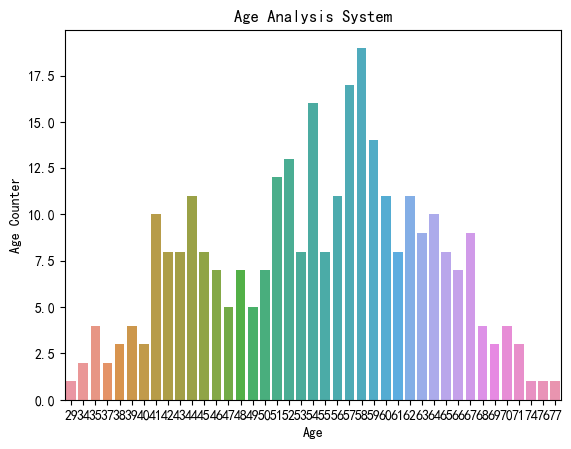

In [905]:
# View the age distribution of the sample
heart_df['age'].value_counts()
sns.barplot(x=heart_df.age.value_counts().index,y=heart_df.age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()


minimum age: 29
maximum age: 77
Average age: 54.37
middle    157
older      90
young      56
Name: age_states, dtype: int64


C:\Users\86153\AppData\Local\Temp\ipykernel_9508\3084738853.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df['age_states'][(heart_df['age']>=0)&(heart_df['age']<45)]='young'
C:\Users\86153\AppData\Local\Temp\ipykernel_9508\3084738853.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df['age_states'][(heart_df['age']>=45)&(heart_df['age']<60)]='middle'
C:\Users\86153\AppData\Local\Temp\ipykernel_9508\3084738853.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

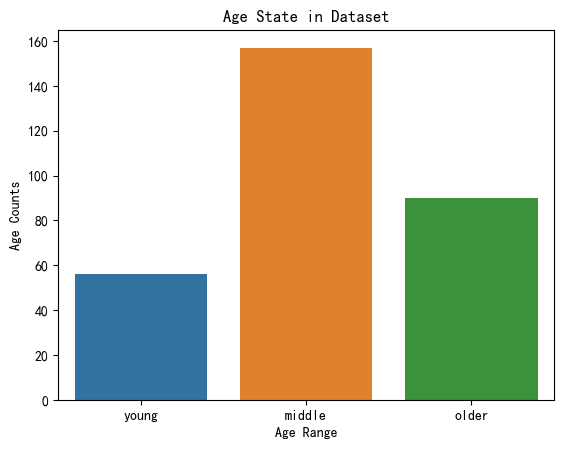

In [906]:
# View the maximum, minimum, and average values of the age columns
minage = min(heart_df.age)
maxage = max(heart_df.age)
meanage = round(heart_df.age.mean(),2)
print('minimum age:',minage)
print('maximum age:',maxage)
print('Average age:',meanage)
# Converting continuous variable age to categorical variable age state
heart_df['age_states']=0
heart_df['age_states'][(heart_df['age']>=0)&(heart_df['age']<45)]='young'
heart_df['age_states'][(heart_df['age']>=45)&(heart_df['age']<60)]='middle'
heart_df['age_states'][(heart_df['age']>=60)&(heart_df['age']<100)]='older'
# View sample sizes by age group
print(heart_df['age_states'].value_counts())
'''
    x: bars on the x-axis, directly as series data y: bars on the y-axis, directly as series data
    order represents the order of the categories on the x-axis.
    hue for category hue_order for order with category
'''
sns.countplot(x='age_states',data=heart_df,order=['young','middle','older'])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Age State in Dataset')
plt.show()

heart_df=heart_df.drop(columns=['age_states'])


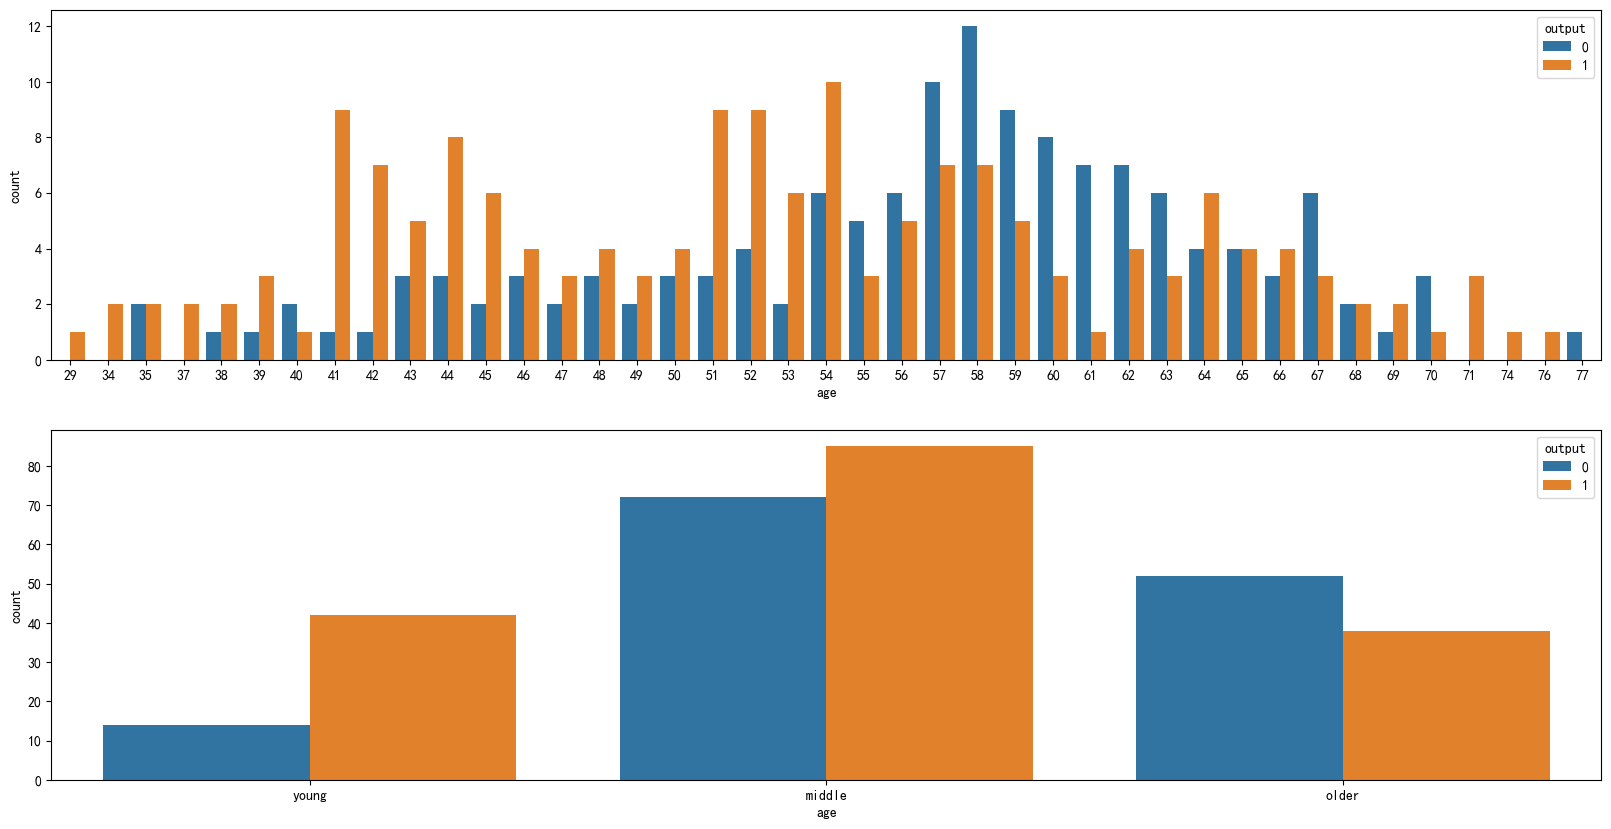

In [907]:
fig,axes = plt.subplots(2,1,figsize=(20,10))
sns.countplot(x="age",hue="output",data=heart_df,ax=axes[0])

# 0-45: young people, 45-59: middle-aged people, 60-100: older people
age_type = pd.cut(heart_df.age,bins=[0,45,60,100],include_lowest=True,right=False,labels=['young', 'middle', 'older'])
age_target_df = pd.concat([age_type,heart_df.output],axis=1)
sns.countplot(x="age",hue='output',data=age_target_df)
plt.show()


1    207
0     96
Name: sex, dtype: int64


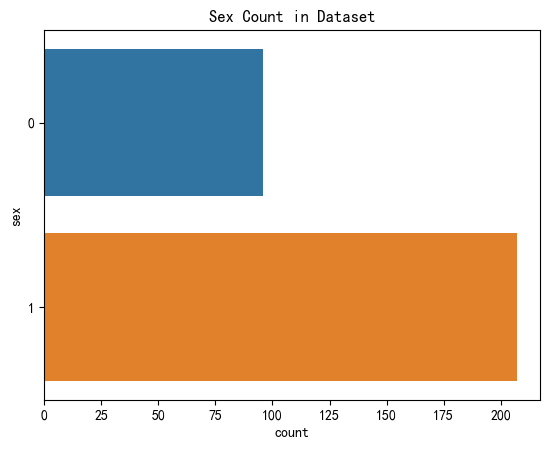

In [908]:
'''
    It is found through the following graph that in the sample with the change of age:
    The amount of data in the sample gradually increases, 16 for young people, 128 for middle-aged people and 159 for older people.
'''
# Gender Sample Data Data Percentage 0 for female 1 for male
print(heart_df['sex'].value_counts())
sns.countplot(y='sex',data=heart_df)
plt.title('Sex Count in Dataset')
plt.show()


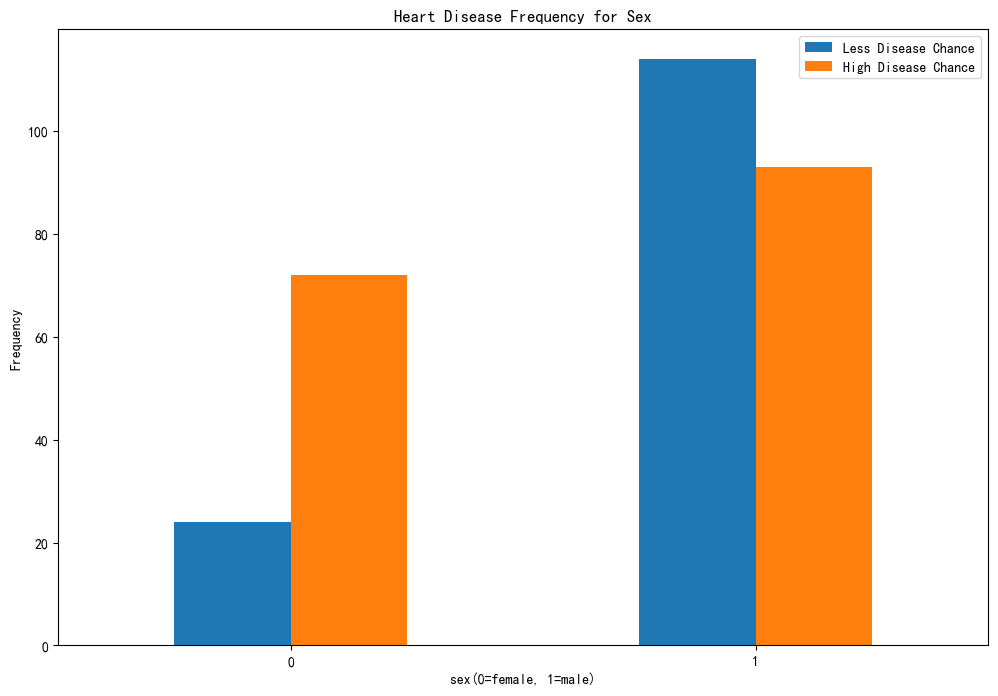

In [909]:
# Column names represent whether or not the heart attack was changed, and row names represent gender.
pd.crosstab(heart_df['sex'],heart_df['output'])
# Relationship between gender and the presence of heart disease 0 for women; 1 for men
pd.crosstab(heart_df['sex'],heart_df['output']).plot(kind="bar",figsize=(12,8))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('sex(0=female, 1=male)')
plt.xticks(rotation=0)
plt.legend(["Less Disease Chance","High Disease Chance"])
plt.ylabel('Frequency')
plt.show()


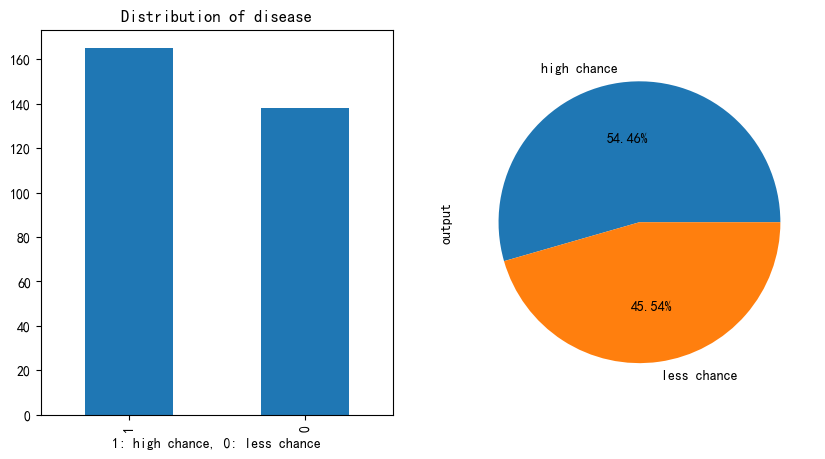

In [910]:
# Heart Disease Prediction - Gender and Prevalence Analysis
# Distribution of prevalence
fig,axes = plt.subplots(1,2,figsize=(10,5))
ax = heart_df.output.value_counts().plot(kind="bar",ax=axes[0])
ax.set_title("Distribution of disease")
ax.set_xlabel("1: high chance, 0: less chance")

heart_df.output.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['high chance','less chance'],ax=axes[1])
plt.show()


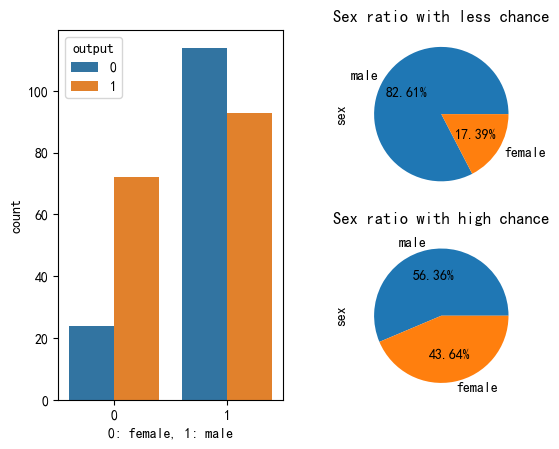

In [911]:
# Distribution of gender and illness
ax1 = plt.subplot(121)
ax = sns.countplot(x="sex",hue='output',data=heart_df,ax=ax1)
ax.set_xlabel("0: female, 1: male")

ax2 = plt.subplot(222)
heart_df[heart_df['output'] == 0].sex.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['male','female'],ax=ax2)
ax2.set_title("Sex ratio with less chance")

ax2 = plt.subplot(224)
heart_df[heart_df['output'] == 1].sex.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['male','female'],ax=ax2)
ax2.set_title("Sex ratio with high chance")
plt.show()


IV. Feature pre-processing

In [912]:
# Data preprocessing
features = heart_df.drop(columns=['output'])
targets = heart_df['output']
# Converts discrete data, from ordinary 0,1,2, to real strings.

# sex
features.loc[features['sex']==0,'sex'] = 'female'
features.loc[features['sex']==1,'sex'] = 'male'

# cp
features.loc[features['cp'] == 0,'cp'] = 'typical'
features.loc[features['cp'] == 1,'cp'] = 'atypical'
features.loc[features['cp'] == 2,'cp'] = 'non-anginal'
features.loc[features['cp'] == 3,'cp'] = 'asymptomatic'

# fbs
features.loc[features['fbs'] == 1,'fbs'] = 'true'
features.loc[features['fbs'] == 0,'fbs'] = 'false'

# exng
features.loc[features['exng'] == 1,'exng'] = 'yes'
features.loc[features['exng'] == 0,'exng'] = 'no'

# slope
features.loc[features['slp'] == 0,'slp'] = 'rising'
features.loc[features['slp'] == 1,'slp'] = 'flat'
features.loc[features['slp'] == 2,'slp'] = 'falling'

# thall
features.loc[features['thall'] == 0,'thall'] = 'null'
features.loc[features['thall'] == 1,'thall'] = 'normal'
features.loc[features['thall'] == 2,'thall'] = 'fixed'
features.loc[features['thall'] == 3,'thall'] = 'reversable'

# restecg
# 0: normal, 1: ST-T wave abnormalities, 2: possible left ventricular hypertrophy
features.loc[features['restecg'] == 0,'restecg'] = 'normal'
features.loc[features['restecg'] == 1,'restecg'] = 'ST-T-abnormal'
features.loc[features['restecg'] == 2,'restecg'] = 'Left-ventricular-hypertrophy'

# caa
features.loc[features['caa'] == 0,'caa'] = 'zero'
features.loc[features['caa'] == 1,'caa'] = 'one'
features.loc[features['caa'] == 2,'caa'] = 'two'
features.loc[features['caa'] == 3,'caa'] = 'three'

features.head()

# then use one-hot coding to encode the feature
features = pd.get_dummies(features)
features_temp = StandardScaler().fit_transform(features)
# features_temp = StandardScaler().fit_transform(pd.get_dummies(features))

X_train,X_test,y_train,y_test = train_test_split(features_temp,targets,test_size=0.25,random_state=random_seed)


V. Various classification methods to achieve classification prediction and algorithm evaluation

In [913]:
def plotting(estimator,y_test):
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    y_predict_proba = estimator.predict_proba(X_test)
    precisions,recalls,thretholds = precision_recall_curve(y_test,y_predict_proba[:,1])
    axes[0].plot(precisions,recalls)
    axes[0].set_title("Average precision rate: %.2f"%average_precision_score(y_test,y_predict_proba[:,1]))
    axes[0].set_xlabel("recall rate")
    axes[0].set_ylabel("precision")

    fpr,tpr,thretholds = roc_curve(y_test,y_predict_proba[:,1])
    axes[1].plot(fpr,tpr)
    axes[1].set_title("AUC value: %.2f"%auc(fpr,tpr))
    axes[1].set_xlabel("FPR")
    axes[1].set_ylabel("TPR")


Clustering-based Approaches

accuracy:  0.8481420765027323
precision:  0.8297872340425532
recall:  0.8666666666666667
F1 score:  0.8478260869565217


d:\Users\86153\anaconda3\envs\joyrl\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Users\86153\anaconda3\envs\joyrl\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

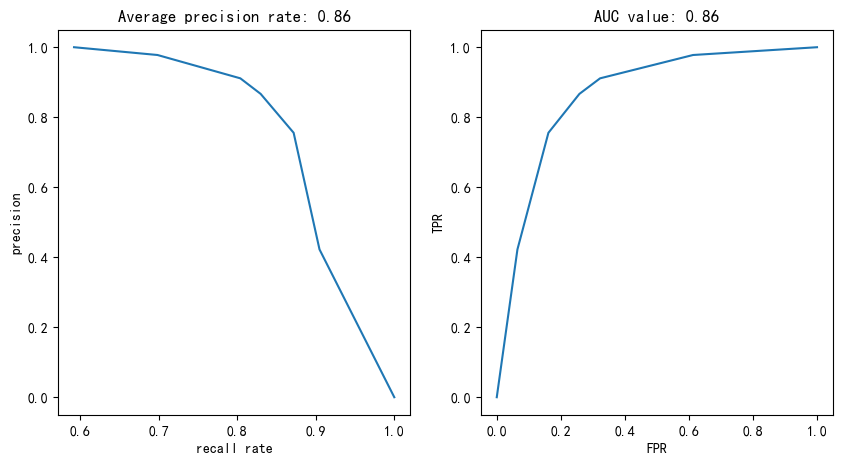

In [914]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,features_temp,targets,cv=5)
print("accuracy: ",scores.mean())

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)
# precision
print("precision: ",precision_score(y_test,y_predict))
# recall
print("recall: ",recall_score(y_test,y_predict))
# F1-Score
print("F1 score: ",f1_score(y_test,y_predict))

plotting(knn,y_test)
plt.show()


Classification-based

accuracy:  0.7189617486338797
precision:  0.7872340425531915
recall:  0.8222222222222222
F1 score:  0.8043478260869565


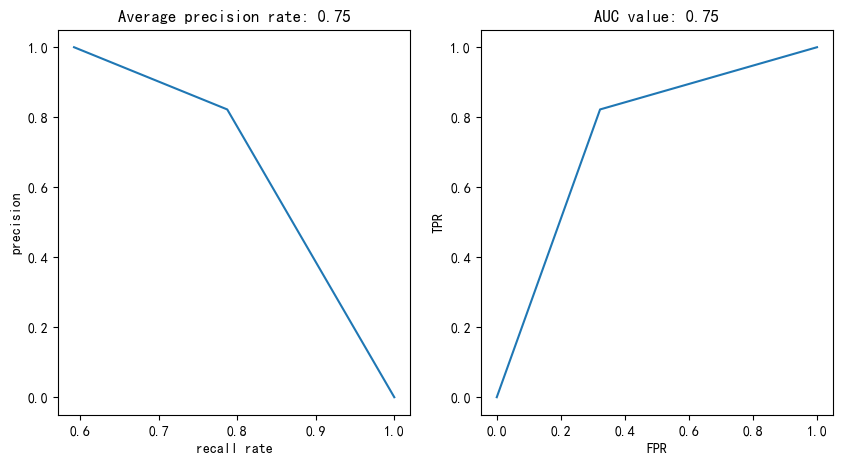

In [915]:
#  Decision tree
tree = DecisionTreeClassifier(max_depth=10,random_state=random_seed)

scores = cross_val_score(tree,features_temp,targets,cv=5)
print("accuracy: ",scores.mean())

tree.fit(X_train,y_train)

y_predict = tree.predict(X_test)
# precision
print("precision: ",precision_score(y_test,y_predict))
# recall
print("recall: ",recall_score(y_test,y_predict))
# F1-Score
print("F1 score: ",f1_score(y_test,y_predict))

plotting(tree,y_test)
plt.show()


accuracy:  0.8283060109289616
precision:  0.8636363636363636
recall:  0.8444444444444444
F1 score:  0.853932584269663


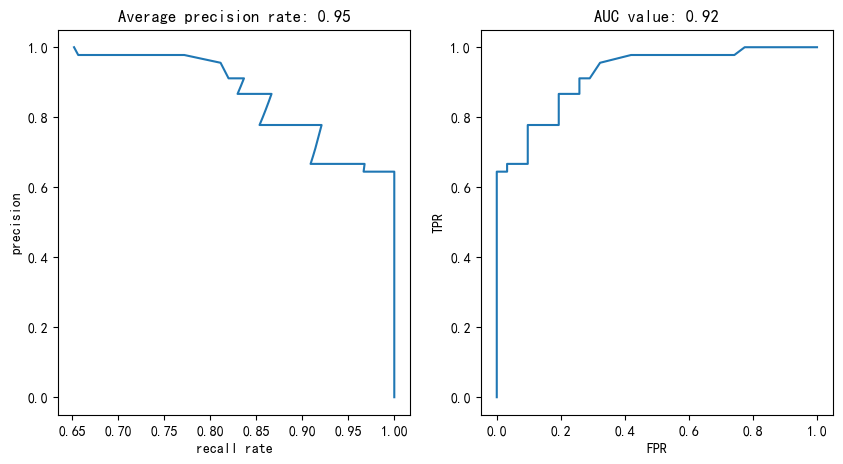

In [916]:
# random forest
rf = RandomForestClassifier(n_estimators=100,random_state=random_seed)

scores = cross_val_score(rf,features_temp,targets,cv=5)
print("accuracy: ",scores.mean())

rf.fit(X_train,y_train)

y_predict = rf.predict(X_test)
# precision
print("precision: ",precision_score(y_test,y_predict))
# recall
print("recall: ",recall_score(y_test,y_predict))
# F1-Score
print("F1 score: ",f1_score(y_test,y_predict))

plotting(rf,y_test)
plt.show()


VI. Association Rule Mining of HAAP Dataset

|variable|description|value area|
|-|-|-|
|output|Presence of heart disease (categorical variable)|target : 0= less chance of heart attack 1= more chance of heart attack|
|age|age (continuous variable)|[29, 77]|
|sex|sex (continuous variable)|0=female, 1=male|
|cp|Experience of chest pain (categorical variable)|0=typical angina, 1=atypical angina, 2=non-angina, 3=asymptomatic|
|trtbps|Resting blood pressure (continuous variable Hg)|[94， 200]|
|chol|Human cholesterol (continuous variable mg/dl)|[126, 564]|
|fbs|Fasting blood glucose (categorical variable >120 mg/dl)|0=false, 1=true|
|restecg|Resting ECG measurements (categorical variables)|0=normal, 1=with ST-T wave abnormalities, 2=probable or definite left ventricular hypertrophy by Estes criteria|
|thalachh|Maximum heart rate (continuous variable)|[71, 202]|
|exng|Exercise-induced angina (categorical variable)|0=no, 1=yes|
|oldpeak|ST-segment depression induced by exercise relative to rest (continuous variable)|[0, 6.2]|
|slp|Slope of peak motion ST segment (categorical variable)|0=rising, 1=flat, 2=falling|
|caa|Number of major vessels (continuous variable)|[0, 3]|
|thall|Blood disorders of thalassemia (categorical variable)|0=null,1=normal, 2=fixed defects, 3=reversible defects|

# Discretization
change the non-category variable to category variable, such as age, trtbps, chols, talachh, oldpeak, caa

- trtbps: [90,139] normal, and [139,200] high
- chol: <200 mg/dl low risk, [200,240] borderline high risk, >240 high risk
- thalachh [150,200] normal, others are abnormal
- oldpeak: normal <=1, >1 abnormal


In [917]:
import pandas as pd

def categorize_age(age):
    if age < 45:
        return "young"
    elif age < 60:
        return "middle"
    else:
        return "older"

def categorize_trtbps(trtbps):
    if trtbps <= 139:
        return "normal"
    else:
        return "high"

def categorize_chol(chol):
    if chol < 200:
        return "low"
    elif chol <= 240:
        return "borderline-high"
    else:
        return "high"

def categorize_thalachh(thalachh):
    if 150 <= thalachh <= 200:
        return "normal"
    else:
        return "abnormal"

def categorize_oldpeak(oldpeak):
    if oldpeak < 1:
        return "normal"
    else:
        return "abnormal"
    



# Data preprocessing
features = heart_df4arm


# Converts discrete data, from ordinary 0,1,2, to real strings.

# sex
features.loc[features['sex']==0,'sex'] = 'female'
features.loc[features['sex']==1,'sex'] = 'male'

# cp
features.loc[features['cp'] == 0,'cp'] = 'typical'
features.loc[features['cp'] == 1,'cp'] = 'atypical'
features.loc[features['cp'] == 2,'cp'] = 'non-anginal'
features.loc[features['cp'] == 3,'cp'] = 'asymptomatic'

# fbs
features.loc[features['fbs'] == 1,'fbs'] = 'true'
features.loc[features['fbs'] == 0,'fbs'] = 'false'

# exng
features.loc[features['exng'] == 1,'exng'] = 'yes'
features.loc[features['exng'] == 0,'exng'] = 'no'

# slope
features.loc[features['slp'] == 0,'slp'] = 'rising'
features.loc[features['slp'] == 1,'slp'] = 'flat'
features.loc[features['slp'] == 2,'slp'] = 'falling'

# thall
features.loc[features['thall'] == 0,'thall'] = 'null'
features.loc[features['thall'] == 1,'thall'] = 'normal'
features.loc[features['thall'] == 2,'thall'] = 'fixed'
features.loc[features['thall'] == 3,'thall'] = 'reversable'

# restecg
# 0: normal, 1: ST-T wave abnormalities, 2: possible left ventricular hypertrophy
features.loc[features['restecg'] == 0,'restecg'] = 'normal'
features.loc[features['restecg'] == 1,'restecg'] = 'ST-T-abnormal'
features.loc[features['restecg'] == 2,'restecg'] = 'Left-ventricular-hypertrophy'

# caa
features.loc[features['caa'] == 0,'caa'] = 'zero'
features.loc[features['caa'] == 1,'caa'] = 'one'
features.loc[features['caa'] == 2,'caa'] = 'two'
features.loc[features['caa'] == 3,'caa'] = 'three'



# other feature
features["age"] = heart_df4arm["age"].apply(categorize_age)
features["trtbps"] = heart_df4arm["trtbps"].apply(categorize_trtbps)
features["chol"] = heart_df4arm["chol"].apply(categorize_chol)
features["thalachh"] = heart_df4arm["thalachh"].apply(categorize_thalachh)
features["oldpeak"] = heart_df4arm["oldpeak"].apply(categorize_oldpeak)

# output
features.loc[features['output'] == 1,'output'] = 'more'
features.loc[features['output'] == 0,'output'] = 'less'

features.head()

print(features)



        age     sex            cp  trtbps             chol    fbs  \
0     older    male  asymptomatic    high  borderline-high   true   
1     young    male   non-anginal  normal             high  false   
2     young  female      atypical  normal  borderline-high  false   
3    middle    male      atypical  normal  borderline-high  false   
4    middle  female       typical  normal             high  false   
..      ...     ...           ...     ...              ...    ...   
298  middle  female       typical    high             high  false   
299  middle    male  asymptomatic  normal             high  false   
300   older    male       typical    high              low   true   
301  middle    male       typical  normal              low  false   
302  middle  female      atypical  normal  borderline-high  false   

           restecg  thalachh exng   oldpeak      slp   caa       thall output  
0           normal    normal   no  abnormal   rising  zero      normal   more  
1    ST-T-a

In [918]:
print(features.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [919]:
# then use one-hot coding to encode the feature
features = pd.get_dummies(features)


In [920]:
frequent_itemsets = apriori(features, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

output_rules = rules[rules['consequents'] == {'output_less'}]
print(output_rules)
output_rules.to_csv("association_rules_output-less.csv", index=False)

                                           antecedents    consequents  \
96                                (exng_yes, sex_male)  (output_less)   
119                    (cp_typical, thalachh_abnormal)  (output_less)   
121                             (exng_yes, cp_typical)  (output_less)   
123                     (cp_typical, oldpeak_abnormal)  (output_less)   
124                             (slp_flat, cp_typical)  (output_less)   
125                     (thall_reversable, cp_typical)  (output_less)   
230                      (exng_yes, thalachh_abnormal)  (output_less)   
231              (thalachh_abnormal, oldpeak_abnormal)  (output_less)   
262               (thall_reversable, oldpeak_abnormal)  (output_less)   
292          (sex_male, cp_typical, thalachh_abnormal)  (output_less)   
343         (fbs_false, cp_typical, thalachh_abnormal)  (output_less)   
347  (cp_typical, thalachh_abnormal, oldpeak_abnormal)  (output_less)   

     antecedent support  consequent support   supp

d:\Users\86153\anaconda3\envs\joyrl\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


PermissionError: [Errno 13] Permission denied: 'association_rules_output-less.csv'

In [ ]:
output_rules = rules[rules['consequents'] == {'output_more'}]
print(output_rules)
output_rules.to_csv("association_rules_output-more.csv", index=False)

                                           antecedents    consequents  \
55                           (age_middle, thall_fixed)  (output_more)   
62                               (exng_no, sex_female)  (output_more)   
65                           (thall_fixed, sex_female)  (output_more)   
103                          (exng_no, cp_non-anginal)  (output_more)   
148                          (caa_zero, trtbps_normal)  (output_more)   
..                                                 ...            ...   
931  (fbs_false, exng_no, caa_zero, trtbps_normal, ...  (output_more)   
942  (fbs_false, exng_no, trtbps_normal, thall_fixe...  (output_more)   
949  (fbs_false, exng_no, caa_zero, trtbps_normal, ...  (output_more)   
955  (thalachh_normal, fbs_false, exng_no, thall_fi...  (output_more)   
961  (thalachh_normal, fbs_false, exng_no, caa_zero...  (output_more)   

     antecedent support  consequent support   support  confidence      lift  \
55             0.264026            0.544554 

# VII Improvement

# Predict

In [ ]:

features=features.drop(columns=['output_less','output_more'])

features_temp = StandardScaler().fit_transform(features)
# features_temp = StandardScaler().fit_transform(pd.get_dummies(features))

X_train,X_test,y_train,y_test = train_test_split(features_temp,targets,test_size=0.25,random_state=random_seed)

Clustering-based Approaches

accuracy:  0.8349726775956284
precision:  0.8297872340425532
recall:  0.8666666666666667
F1 score:  0.8478260869565217


d:\Users\86153\anaconda3\envs\joyrl\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\Users\86153\anaconda3\envs\joyrl\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

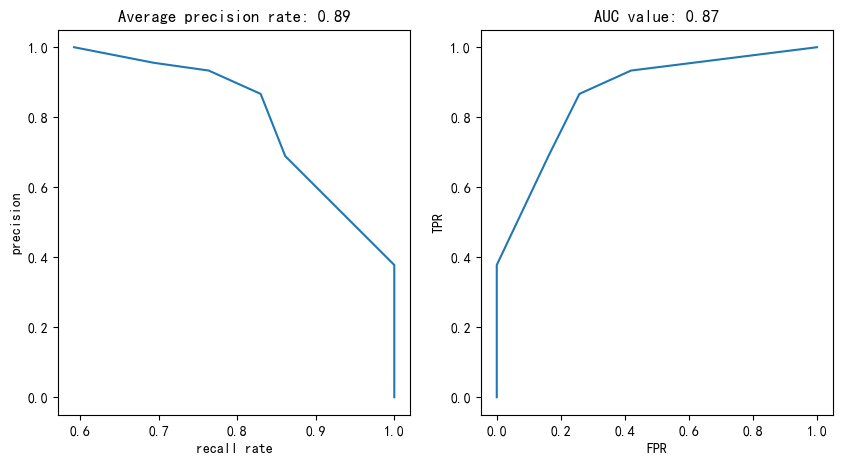

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,features_temp,targets,cv=5)
print("accuracy: ",scores.mean())

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)
# precision
print("precision: ",precision_score(y_test,y_predict))
# recall
print("recall: ",recall_score(y_test,y_predict))
# F1-Score
print("F1 score: ",f1_score(y_test,y_predict))

plotting(knn,y_test)
plt.show()


Classification-based

accuracy:  0.7556284153005464
precision:  0.813953488372093
recall:  0.7777777777777778
F1 score:  0.7954545454545455


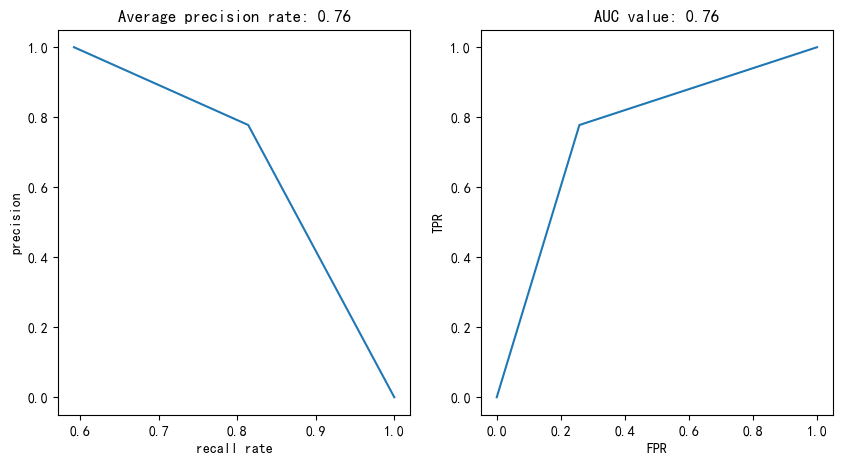

In [ ]:
#  Decision tree
tree = DecisionTreeClassifier(max_depth=10,random_state=random_seed)

scores = cross_val_score(tree,features_temp,targets,cv=5)
print("accuracy: ",scores.mean())

tree.fit(X_train,y_train)

y_predict = tree.predict(X_test)
# precision
print("precision: ",precision_score(y_test,y_predict))
# recall
print("recall: ",recall_score(y_test,y_predict))
# F1-Score
print("F1 score: ",f1_score(y_test,y_predict))

plotting(tree,y_test)
plt.show()


accuracy:  0.8281967213114754
precision:  0.8444444444444444
recall:  0.8444444444444444
F1 score:  0.8444444444444444


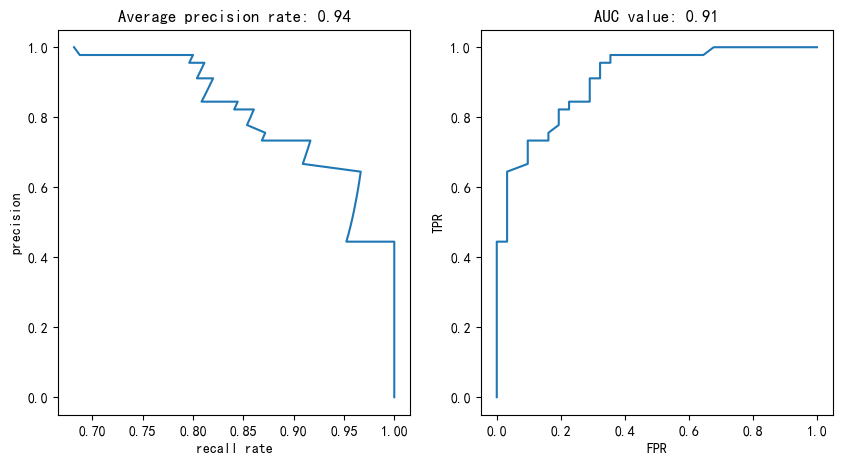

In [ ]:
# random forest
rf = RandomForestClassifier(n_estimators=100,random_state=random_seed)

scores = cross_val_score(rf,features_temp,targets,cv=5)
print("accuracy: ",scores.mean())

rf.fit(X_train,y_train)

y_predict = rf.predict(X_test)
# precision
print("precision: ",precision_score(y_test,y_predict))
# recall
print("recall: ",recall_score(y_test,y_predict))
# F1-Score
print("F1 score: ",f1_score(y_test,y_predict))

plotting(rf,y_test)
plt.show()



Characteristic Importance Analysis

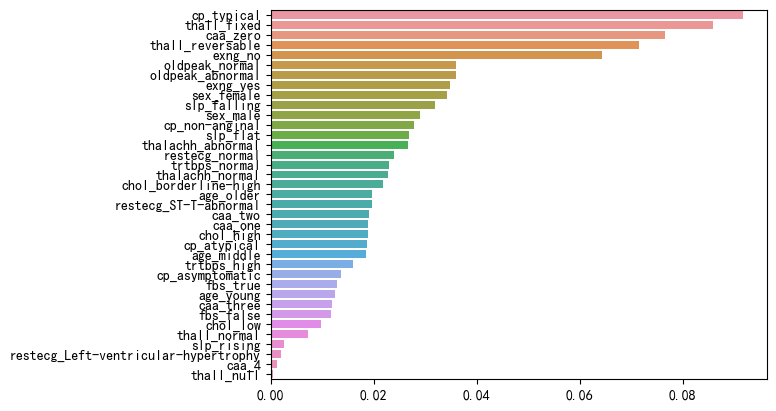

In [ ]:
# Heart Disease Prediction-Characteristic Importance Analysis
importances = pd.Series(data=rf.feature_importances_,index=features.columns).sort_values(ascending=False)
sns.barplot(y=importances.index,x=importances.values,orient='h')
plt.show()